<a href="https://colab.research.google.com/github/MuHyeonSon/BME_Capstone_design/blob/main/sleep_staging_classification_256Hz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터처리

In [ ]:
print(f'Signals of 151 subjects  : {Signals[:10]}')
print(f'Labels of 151 subjects : {Labels[:10]}')
print(f'number of segment from Signals of 151 subjects  : {len(Signals)}')
print(f'number of segment from Labels of 151 subjects : {len(Labels)}')

Signals of 151 subjects  : [array([ 73.71938659,  70.93614099,  69.39803159, ..., -91.1512932 ,
        14.83176928,  30.65232319]), array([-15.71068894, -48.37720302, -55.04234379, ..., 126.52780957,
       135.17051957, 137.51430533]), array([137.44106203, 128.06591897, 133.41268025, ...,  14.53879606,
        14.17257954,  12.56122683]), array([  8.60608835,  -5.0904097 , -12.78095674, ...,  53.65072099,
        32.70313573,  14.97825589]), array([  0.54932479, -20.10528725, -40.68665599, ...,   0.18310826,
        -8.23987182,  -2.38040742]), array([  2.89311055,   9.85122454,  17.76150149, ..., 125.64888991,
       170.32730602, 242.10574502]), array([354.09475853, 478.90135042, 650.07095445, ..., -28.52826734,
       -30.50583658, -38.049897  ]), array([ -40.61341268,  -37.75692378,  -31.09178302, ..., -296.08606088,
       -538.814374  , -613.4493019 ]), array([-572.94575418, -462.93430991, -367.35179675, ...,  -10.29068437,
        -11.53582055,  -17.02906844]), array([-24.5731

In [ ]:
256*30*2*60*7*151 #9억7만개의 정도의 sample

974131200

In [ ]:
2*60*7*151 #151명의 피험자에서 나온 segment의 대략적인 개수

126840

In [ ]:
num_sample = 256*30

def remove_remains(lst, n):
    removed = [lst[i:i+n] for i in range(0, len(lst), n)]
    removed.pop()
    return removed

list_test = list(range(1,32))
print("분할 전 : ", list_test)

list_chunked = remove_remains(list_test, 3) # paramter : 분할할 리스트, 리스트의 길이
print("분할 후 : ", removed)

분할 전 :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
분할 후 :  [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15], [16, 17, 18], [19, 20, 21], [22, 23, 24], [25, 26, 27], [28, 29, 30]]


In [ ]:
#151명 중 약 17%인 25명을 test set으로 선정
# 첫번째 데이터부터 151번째 데이터까지 순서대로 6명마다 1명이 testset으로 뽑히도록

test_x = []
test_y = []
test_index_list = []

for i in range(len(trains)):
  if (i+1) % 6 == 0:
    test_x.append(trains[i])
    test_y.append(labels[i])
    test_index_list.append(i)


print(f'test_x={test_x}')   
print(f'test_y={test_y}') 

test_x=['/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN006.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN012.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN019.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN025.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN031.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN037.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN043.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN049.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN055.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN061.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN068.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN074.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sl

In [ ]:
print(f'num_test_x={len(test_x)}')   
print(f'num_test_y={len(test_y)}') 

num_test_x=25
num_test_y=25


In [ ]:
print("test_set 목록")
for i in test_x:
  print(i)

test_set 목록
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN006.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN012.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN019.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN025.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN031.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN037.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN043.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN049.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN055.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN061.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN068.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN074.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN080.edf


#Sleep_staging_classification

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


download libraries

In [2]:
!pip install pyEDFlib  #pyEDFlib 라이브러리를 다운로드

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 4.1 MB/s 


In [3]:
!pip install pyedflib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 462 kB 4.3 MB/s 


import libraries

In [1]:
import os  
from pyedflib import highlevel
import pyedflib
import glob
from itertools import accumulate
import numpy as np 
import torch
import matplotlib.pyplot as plt
#모듈 import
from sklearn.datasets import load_iris  #(2)sklearn라이브러리에 detasets패키지 모듈 import
from sklearn.model_selection import train_test_split  #(3)sklearn.model_selection패키지의 train_test_split를 활용해 데이터셋 분리
from sklearn.tree import DecisionTreeClassifier #(4)sklearn.tree패키지에 DecisionTreeClassifier import
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score #정확도

경로 설정

In [2]:
r_path = "/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/" #데이터들이 있는 경로

/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN001.#72번째 문자가 edf로 끝나는 경로명

SNxxx.edf로 끝나는 signal데이터와 SNxxx_sleepscoring.edf를 구분하기 위해 



In [3]:
data_list = sorted(glob.glob(r_path+'/**')) #이름 순으로 정렬하여 r_path에 있는 데이터의 경로명들 전부 불러와 data_list에 할당

l = len(data_list[0]) - 3 #SNxxx.edf로 끝나는 signal데이터와 SNxxx_sleepscoring.edf를 구분하기 위해
                          # signal data( 예를 들어 '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN002.edf')
                          # signal data끼리는 경로명의 문자열길이가 다 같다
                          # 하지만 label data는 'sleepscoring.edf'로 끝나 signal data의 경로명과 문자열 길이가 다름
                          # signal data들만 따로 모아 리스트에 담기 위해서는 siganl data의 경로명 문자열 길이에서 3을 뺀것이"edf"가 되는 것들만 모아야됨

print(f'데이터 경로 : {data_list}')
print("\n")

# signal data들의 경로를 모두 trains에 리스트에 담고, #train valid test와 헷갈리지 말 것.
# labels data들의 경로들은 모두 labels 리스트에 담는다
trains = [x for x in data_list if x.startswith('edf',l)] #signal data 경로의 길이에서 3을 뺀 인덱스의 문자가 edf로 끝나면 signal 데이터 리스트에 담는다
labels = [x for x in data_list if x.endswith('_sleepscoring.edf')] #경로명이 "_sleepscoring.edf"로 끝나면 labels 리스트에 담는다


# ram 과부하로 인해 100개 데이터만 사용 하려면 밑에 trains랑 labels 주석처리 지우고 사용
#trains = trains[:100]
#labels = labels[:100]

print(f'signal_data 경로 : {trains}')
print("\n")
print(f'label_data 경로 : {labels}')
print("\n")
print(f"첫번째 signal data : {highlevel.read_edf(trains[0],ch_names='ECG')}")
print("\n")
print(f'첫번째 label data : {highlevel.read_edf(labels[0])}')
print("\n")
#print(highlevel.read_edf(trains[0],ch_names='ECG',digital=True))
#a = highlevel.read_edf(trains[0],ch_names='ECG')
#b = highlevel.read_edf(labels[0],ch_names='ECG')
#print(type(highlevel.read_edf(trains[0])))
#print(type(highlevel.read_edf(labels[0])))

print(f"Total signal count: {len(trains)}")
#print(f"Label names: {class_names}")
print(f"Label counts: {len(labels)}")

데이터 경로 : ['/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN001.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN001_sleepscoring.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN001_sleepscoring.txt', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN002.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN002_sleepscoring.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN002_sleepscoring.txt', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN003.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN003_sleepscoring.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN003_sleepscoring.txt', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN004.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN004_sleepscoring.edf', '/content/drive/MyDrive/physio

test set 분리 

In [4]:
#151명 중 약 17%인 25명을 test set으로 선정
# 첫번째 데이터부터 151번째 데이터까지 순서대로 6명마다 1명이 testset으로 뽑히도록

test_x = []
test_y = []
test_index_list = []

for i in range(len(trains)):
  if (i+1) % 6 == 0:
    test_x.append(trains[i])
    test_y.append(labels[i])
    test_index_list.append(i)


print(f'test_x={test_x}')   
print(f'test_y={test_y}') 

test_x=['/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN006.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN012.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN019.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN025.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN031.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN037.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN043.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN049.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN055.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN061.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN068.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN074.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sl

In [5]:
for i in test_x:
  trains.remove(i)
for i in test_y:
  labels.remove(i)

print("분리 후 test_set과 나머지 train_set의 수\n")
print("test_set")
print(f'num_test_x={len(test_x)}')   
print(f'num_test_y={len(test_y)}\n')
print("train_set")
print(f'num_trains={len(trains)}')   
print(f'num_label={len(labels)}')  

분리 후 test_set과 나머지 train_set의 수

test_set
num_test_x=25
num_test_y=25

train_set
num_trains=126
num_label=126


In [6]:
print("test_set 목록")
for i in test_x:
  print(i)

test_set 목록
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN006.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN012.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN019.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN025.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN031.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN037.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN043.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN049.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN055.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN061.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN068.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN074.edf
/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN080.edf


전체 데이터 전처리(학습에 사용할 데이터셋)

In [7]:
# 한 피험자의 기록데이터에서 annotation이 되어 있지 않은 30초 이내의 remainder 영역을
# 제거하기 위한 함수
# lst : 한 피험자의 모든 signal sample로 구성된 리스트
# n : 샘플주파수 x 30초 (ex 256Hz -> n = 256 x 30)

Signals = []
Labels = []

def remove_remains(lst, n):
    removed = [lst[i:i+n] for i in range(0, len(lst), n)]
    removed.pop()
    return removed

match = 0
non_match = []
length = []
for i in range(len(trains)):
  #print(f'trains[{i}] : {trains[i]}')
  #print(f'trains[{i}] : {labels[i]}')

  #label data 전처리 (Lights off, Lights on, duration 및 시간 정보 제거하여 수면staging 정보만 남김)
  _, _, annotations_header = highlevel.read_edf(labels[i])
  ann = annotations_header['annotations']
  label = []
  for j in range(len(ann)):
    s = ann[j][2][0].upper()       #첫 번째 글자가 S인 것만 추출
    if s == 'S':                   #Lights off & Lights on 제거
      label.append(ann[j][2])
  annotations_len = len(label)
  
  #signal data 전처리
  num_sample = 256*30   #7680
  signals, _, signals_header = highlevel.read_edf(trains[i],ch_names='ECG') #ECG신호만 추출
  signal = remove_remains(signals[0], num_sample)
  signals_len = len(signal)

  #print(f'sinals_len : {signals_len}')
  #print(f'annotations_len : {annotations_len}')
  #print("\n")
  
  if signals_len == annotations_len:     # 30초 단위의 segment수와 label수가 일치해야만 Train data로 사용할 수 있도록
    match += 1
    
    for sample in range(signals_len):
      length.append(len(signal[sample]))
      Signals.append(signal[sample])
      Labels.append(label[sample])
  else :
    non_match.append((trains[i],labels[i])) 

# (초당 샘플수 (256HZ)) x 한 구간의 시간 = 256 * 30 = 7680
# => 모든 데이터들이 256HZ로 샘플링 되어 있으니 한 구간에 샘플수는 7680이 되어야 하는데 7680이 아닌 것들이 나옴
# => 해결해야될 것
# => 데이터 담기 전에 모든 signal 데이터에 대해 30초 단위로 딱 끊기게 해야됨
# => 레코딩 맨 마지막 부분에 경우 30초가 넘어 남는 부분들이 있는데 이부분 잘라내야됨
# => 7680으로 나눠서 나머지 부분 다 잘라내야되는데 이부분 어떻게 할까? ecg_signal =[:7680*(전체 샘플수 // 30초)]
print(f'num_matched : {match}')
print(f'num_non_matched : {len(non_match)}')
print(f'non_matched_list : {non_match}')
print(f'max_length  : {max(length)}')
print(f'min_length : {min(length)}')
print(f'Signals of 151 subjects  : {Signals}')
print(f'Labels of 151 subjects : {Labels}')

del non_match
del length
del label

# 5/18
# data가 sequential한 data다.
# 그렇다면 피험자 단위로 data를 구분해야 의미가 있을 것이다
# -> 그렇다면 이작업은 어떻게 진행할 것이고
# -> 모델에 입력은 어떻게 하여 학습시킬 것인가..
# 256Hz sampling의 경우 -> 총 paramter의 개수 : 모델의 입력 숫자(7680) * 모델의 출력 숫자(5) : 38400개

# loss fucntion 정의를 용이하게 하기위해 softmax
# loss function 어떻게 정의할 건지가 제일 중요
# cross Entropy Loss -> 대소관계가 없는 class를(ex 개,고양이 분류) 맞췄다 아니다를 판단할 때 굉장히 유용한 matric임
# loss function은 parameter를 업데이트 하기에 더 유리한 방법
# accuracy : 
# accuracy : Sigma(T)/(Sigma(T) + Sigma(F)) // T, F 모두 개수
# 사람한테 정보를 주는 것은 accuracy가 좀 더 나음 (Test inference 단계)


#testset -> meta정보가 없으니 특징에 대해 피험자는 random하게 분포?해있다고 가정하고 1~154(151명)에서 대략적으로 일정한 구간마다 하나씩 총 30개의 test data 뽑음 
#LSTM

#signal = [[SN001],[SN002],...,[SN151]]
#[SN001] : [[30초 단위의 segment(7680개의 sample)],[30초 단위의 segment(7680개의 sample)],..,[30초 단위의 segment(7680개의 sample)]]

#LSTM을 사용한다면 위와 같은 형태로 바꿔야 될 것 같은데
# 현재는 signal : [[30초 단위의 segment(7680개의 sample)],[30초 단위의 segment(7680개의 sample)],..,[30초 단위의 segment(7680개의 sample)]]
# 피험자 구분없이 한 리스트에 다 담았음
#        label : [Sleep stage W, Sleep stage W, Sleep stage N1]



num_matched : 126
num_non_matched : 0
non_matched_list : []
max_length  : 7680
min_length : 7680


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
#del non_match
#del length
#del label

In [8]:
del data_list
del trains
del labels
del test_index_list

##keras 사용할 때 이 셀 부터 "keras timeseries classification"전까지의 셀 들은 실행시키지 말 것

In [14]:
# test data 부분 수정했음

val_frac = 0.1 # 전체 데이터 중 valid data의 비율
length = len(trains) # 전체 데이터의 수
indices = np.arange(length) # ndarray를 생성 length=3으로 설정하면 -> array([0,1,2])가 리턴 됨
np.random.shuffle(indices) #배열순서를 random하게 섞음 -> [SN045, SN075, SN112,...] 이런 식으로 섞이도록
                            # 이부분 지워야되는지 , 학습시킬때마다 valid가 바뀌면 overfitting 됐는지 알 수 없으니까?

#val_split = int(val_frac * length) + test_split #10%에 해당하는 데이터와 test data수를 합친 수를 저장  
#val_indices = indices[test_split:val_split] #testsplite의 마지막 원소부터 val_split의수 만큼의 원소를 추출

val_split = int(val_frac * length)
val_indices = indices[:val_split]
train_indices = indices[val_split:] # 나머지 인덱스에 해당하는 원소를 모두 train_indices로 저장

train_x = [trains[i] for i in train_indices] # signal data들(trains리스트)로부터 인덱싱을 통해 train 데이터셋 추출
train_y = [labels[i] for i in train_indices]      # label data들(labels리스트)로부터 train 데이터에 대한 레이블데이터 추출
val_x = [trains[i] for i in val_indices]     # signal data들(trains리스트)로부터 인덱싱을 통해 valid 데이터셋 추출
val_y = [labels[i] for i in val_indices]          # label data들(labels리스트)로부터 valid 데이터에 대한 레이블데이터 추출

# train,valid,test 각 데이터의 수 출력
print(
    f"Training count: {len(train_x)}, Validation count: "
    f"{len(val_x)}")

NameError: ignored

In [ ]:
print(f'train_x : {train_x[3]}')
print(f'train_y : {train_y[3]}')

train_x : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN026.edf
train_y : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN026_sleepscoring.edf


In [ ]:
#여기 수정 필요

# Prepare training, validation data lists (min_length)
# length : 한 구간(30초)에서의 sample(진폭)data의 수

Train_x = []
Train_y = []
Val_x = []
Val_y = []

train_non_match = []
train_match = 0
val_non_match = []
val_match = 0

num_sample = 256*30 #7680

def remove_remains(lst, n):
    removed = [lst[i:i+n] for i in range(0, len(lst), n)]
    removed.pop()
    return removed

#tain data 준비

for i in range(len(train_x)):
  print(f'train_x[{i}] : {train_x[i]}')
  print(f'train_y[{i}] : {train_y[i]}')

  #label data 전처리
  _, _, annotations_header = highlevel.read_edf(train_y[i])
  ann = annotations_header['annotations']
  label = []
  for j in range(len(ann)):
    s = ann[j][2][0].upper()       #첫 번째 글자가 S인 것만 추출
    if s == 'S':                   #Lights off & Lights on 제거
      label.append(ann[j][2])
  annotations_len = len(label)    

  #signal data 전처리

  signals, _, signals_header = highlevel.read_edf(train_x[i],ch_names='ECG')
  signal = remove_remains(signals[0], num_sample)
  signals_len = len(signal)
  print(f'signals_len : {signals_len}')
  print(f'annotations_len : {annotations_len}')
  print("\n")
  
  if signals_len == annotations_len:     # 30초 단위의 signal sample수와 label 수가 일치해야만 Train data로 사용할 수 있도록
    train_match += 1
    
    for sample in range(signals_len):
      Train_x.append(signal[sample])
      Train_y.append(label[sample])
  else :
    train_non_match.append((train_x[i],train_y[i])) 

print(f'num_train_matched : {train_match}')
print(f'num_train_non_matched : {len(train_non_match)}')
print(f'train_non_matched_list : {train_non_match}')


#valid data 준비

for i in range(len(val_x)):
  print(f'val_x[{i}] : {val_x[i]}')
  print(f'val_y[{i}] : {val_y[i]}')

  #label data 전처리
  _, _, annotations_header = highlevel.read_edf(val_y[i])
  ann = annotations_header['annotations']
  label = []
  for j in range(len(ann)):
    s = ann[j][2][0].upper()       #첫 번째 글자가 S인 것만 추출
    if s == 'S':                   #Lights off & Lights on 제거
      label.append(ann[j][2])
  annotations_len = len(label)    

  #signal data 전처리

  signals, _, signals_header = highlevel.read_edf(val_x[i],ch_names='ECG')
  signal = remove_remains(signals[0], num_sample)
  signals_len = len(signal)
  print(f'signals_len : {signals_len}')
  print(f'annotations_len : {annotations_len}')
  print("\n")
  
  if signals_len == annotations_len:     # 30초 단위의 signal sample수와 label 수가 일치해야만 Train data로 사용할 수 있도록
    val_match += 1
    
    for sample in range(signals_len):
      Val_x.append(signal[sample])
      Val_y.append(label[sample])
  else :
    val_non_match.append((val_x[i],val_y[i])) 


print(f'num_val_matched : {val_match}')
print(f'num_val_non_matched : {len(val_non_match)}')
print(f'val_non_matched_list : {val_non_match}')

train_x[0] : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN005.edf
train_y[0] : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN005_sleepscoring.edf
signals_len : 959
annotations_len : 959


train_x[1] : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN046.edf
train_y[1] : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN046_sleepscoring.edf
signals_len : 711
annotations_len : 711


train_x[2] : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN082.edf
train_y[2] : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN082_sleepscoring.edf
signals_len : 745
annotations_len : 745


train_x[3] : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN026.edf
train_y[3] : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN026_sleepscoring.edf
signals_len : 883
annotations_len : 883


train_x[4] : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/

In [ ]:
# result

print(f'train_num_matched : {train_match}')
print(f'train_num_non_matched : {len(train_non_match)}')
print(f'train_non_matched_list : {train_non_match}')
print(f'num_val_matched : {val_match}')
print(f'num_val_non_matched : {len(val_non_match)}')
print(f'val_non_matched_list : {val_non_match}')
print(f'total_num_matched : {train_match + val_match}')
print(f'total_num_non_matched : {len(train_non_match) + len(val_non_match)}')


train_num_matched : 114
train_num_non_matched : 0
train_non_matched_list : []
num_val_matched : 12
num_val_non_matched : 0
val_non_matched_list : []
total_num_matched : 126
total_num_non_matched : 0


1개에 대해 전처리
(이 코드들 기반으로 위에서 전체 데이터에 대해 전처리 과정 수행)

실행할 필요 없음

In [ ]:
_, _, annotations_header = highlevel.read_edf(labels[27])
ann = annotations_header['annotations']
print(ann)
print(ann[0][2])
label = []
for i in range(len(ann)):
  j = ann[i][2][0].upper()
  if j == 'S':                   #Lights off & Lights on 제거
    label.append(ann[i][2])

[[0.0, 30.0, 'Sleep stage W'], [30.0, 30.0, 'Sleep stage W'], [32.4, 0.0, 'Lights off@@SaO2'], [60.0, 30.0, 'Sleep stage W'], [90.0, 30.0, 'Sleep stage W'], [120.0, 30.0, 'Sleep stage W'], [150.0, 30.0, 'Sleep stage W'], [180.0, 30.0, 'Sleep stage W'], [210.0, 30.0, 'Sleep stage W'], [240.0, 30.0, 'Sleep stage W'], [270.0, 30.0, 'Sleep stage W'], [300.0, 30.0, 'Sleep stage W'], [330.0, 30.0, 'Sleep stage W'], [360.0, 30.0, 'Sleep stage W'], [390.0, 30.0, 'Sleep stage W'], [420.0, 30.0, 'Sleep stage W'], [450.0, 30.0, 'Sleep stage W'], [480.0, 30.0, 'Sleep stage W'], [510.0, 30.0, 'Sleep stage W'], [540.0, 30.0, 'Sleep stage W'], [570.0, 30.0, 'Sleep stage W'], [600.0, 30.0, 'Sleep stage W'], [630.0, 30.0, 'Sleep stage W'], [660.0, 30.0, 'Sleep stage W'], [690.0, 30.0, 'Sleep stage W'], [720.0, 30.0, 'Sleep stage N1'], [750.0, 30.0, 'Sleep stage W'], [780.0, 30.0, 'Sleep stage W'], [810.0, 30.0, 'Sleep stage W'], [840.0, 30.0, 'Sleep stage W'], [870.0, 30.0, 'Sleep stage W'], [900.0, 30

In [ ]:
signals, _, signals_header = highlevel.read_edf(trains[27],ch_names='ECG')
print(f'signals={signals}')
print(f'label={label}')
print(len(signals[0]))
signals_len = len(signals[0]) // 256 // 30 #전체 진폭데이터를 초당 256HZ로 샘플링 되었으니까 나누게 되면 이 기록데이터 하나의 시간이 나오고 그걸 30초로 나누면 한 기록데이터에서 30초 단위의 데이터가 몇개 나오는지 알 수 있다.
annotations_len = len(label)
print(f'signals_len : {signals_len}')
print(f'annotations_len : {annotations_len}')
print(signals_header['startdate'])
print(annotations_header['startdate'])
signals = np.array(signals)
print(trains[27])

signals=[[-4.95161364e+02 -3.51604486e+02 -2.39322499e+02 ... -3.66216526e-02
  -3.66216526e-02 -3.66216526e-02]]
label=['Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage N1', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage W', 'Sleep stage N1', 'Sleep stage N1', 'Sleep stage N1', 'Sleep stage N1', 'Sleep stage N1', 'Sleep stage N1', 'Sleep stage N1', 'Sleep stage N1', 'Sleep stage N1', 'Sleep stage N1', 'Sleep stage N2', 'Sleep stage N1', 'Sleep stage W', 'Sleep stage W', 'Sleep stage N1', 'Sleep stage N1', 'Sleep stage N1', 'Sleep stage 

define custom dataloader

In [ ]:
#custom dataloader

##keras timeseries classification 

import lib

In [12]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#tensorflow.keras.utils.to_categorical

import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [9]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
!nvidia-smi

Sat May 28 11:16:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    28W /  70W |   1442MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [13]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [14]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.list_physical_devices('GPU')
  except RuntimeError as e:
    print(e) 


class 비율 분석

In [15]:
df = pd.DataFrame(
        {'class' : Labels
        })

In [16]:
df.shape

(114573, 1)

In [17]:
df.head()

,class
0,Sleep stage W
1,Sleep stage W
2,Sleep stage W
3,Sleep stage W
4,Sleep stage W


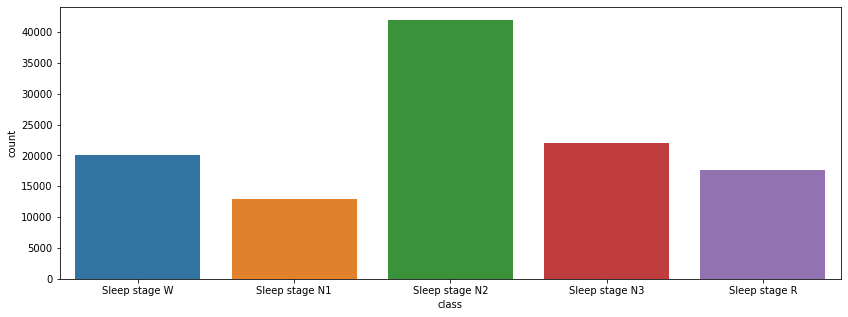

In [18]:
figure, (ax1) = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(14,5)

sns.countplot(data=df, x="class", ax=ax1)

In [19]:
num_W = Labels.count('Sleep stage W')
num_N1 = Labels.count('Sleep stage N1')
num_N2 = Labels.count('Sleep stage N2')
num_N3 = Labels.count('Sleep stage N3')
num_R = Labels.count('Sleep stage R')

# each number of classes

print(f'num_W : {num_W}')
print(f'num_N1 : {num_N1}')
print(f'num_N2 : {num_N2}')
print(f'num_N3 : {num_N3}')
print(f'num_R : {num_R}')
num_total = num_W + num_N1 + num_N2 + num_N3 + num_R
print(f'num_total : {num_total}')

# each ratio of classes

print(f'ratio_W : {round((num_W / num_total),2)}')
print(f'ratio_N1 : {round((num_N1 / num_total),2)}')
print(f'ratio_N2 : {round((num_N2 / num_total),2)}')
print(f'ratio_N3 : {round((num_N3 / num_total),2)}')
print(f'ratio_R : {round((num_R / num_total),2)}')


num_W : 20017
num_N1 : 12914
num_N2 : 41961
num_N3 : 22021
num_R : 17660
num_total : 114573
ratio_W : 0.17
ratio_N1 : 0.11
ratio_N2 : 0.37
ratio_N3 : 0.19
ratio_R : 0.15


train_set 준비

In [20]:
x_train = np.array(Signals)
del Signals
y_train = np.array(Labels)
del Labels

In [21]:
num_classes = len(np.unique(y_train))
print(num_classes)

5


In [22]:
print(f'x_train : {x_train}')
print(f'x_train : {y_train}')
print(f'x_train.shape : {x_train.shape}')
print(f'x_train.shape : {y_train.shape}')

x_train : [[ 73.71938659  70.93614099  69.39803159 ... -91.1512932   14.83176928
   30.65232319]
 [-15.71068894 -48.37720302 -55.04234379 ... 126.52780957 135.17051957
  137.51430533]
 [137.44106203 128.06591897 133.41268025 ...  14.53879606  14.17257954
   12.56122683]
 ...
 [-53.06477455 -37.39070726 -39.95422293 ... -40.10070954 -38.56260014
  -44.34882124]
 [-46.03341726 -46.6193637  -47.27855344 ...  32.48340581   4.94392309
   26.84367132]
 [ 28.60151064  21.42366674  37.31746395 ...  13.00068666   6.4820325
  -13.95284962]]
x_train : ['Sleep stage W' 'Sleep stage W' 'Sleep stage W' ... 'Sleep stage N1'
 'Sleep stage W' 'Sleep stage W']
x_train.shape : (114573, 7680)
x_train.shape : (114573,)


In [24]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

In [48]:
print(f'x_train : {x_train}')
print(f'x_train : {y_train}')
print(f'x_train.shape : {x_train.shape}')
print(f'x_train.shape : {y_train.shape}')

x_train : [[[ 73.71938659]
  [ 70.93614099]
  [ 69.39803159]
  ...
  [-91.1512932 ]
  [ 14.83176928]
  [ 30.65232319]]

 [[-15.71068894]
  [-48.37720302]
  [-55.04234379]
  ...
  [126.52780957]
  [135.17051957]
  [137.51430533]]

 [[137.44106203]
  [128.06591897]
  [133.41268025]
  ...
  [ 14.53879606]
  [ 14.17257954]
  [ 12.56122683]]

 ...

 [[-53.06477455]
  [-37.39070726]
  [-39.95422293]
  ...
  [-40.10070954]
  [-38.56260014]
  [-44.34882124]]

 [[-46.03341726]
  [-46.6193637 ]
  [-47.27855344]
  ...
  [ 32.48340581]
  [  4.94392309]
  [ 26.84367132]]

 [[ 28.60151064]
  [ 21.42366674]
  [ 37.31746395]
  ...
  [ 13.00068666]
  [  6.4820325 ]
  [-13.95284962]]]
x_train : ['Sleep stage W' 'Sleep stage W' 'Sleep stage W' ... 'Sleep stage N1'
 'Sleep stage W' 'Sleep stage W']
x_train.shape : (114573, 7680, 1)
x_train.shape : (114573,)


In [17]:
print((x_train[0][0][0]))
print(type(x_train[0][0][0]))

73.71938658731976
<class 'numpy.float64'>


In [18]:
print(y_train)
print((y_train[0]))
print(type(y_train[0]))

['Sleep stage W' 'Sleep stage W' 'Sleep stage W' ... 'Sleep stage N1'
 'Sleep stage W' 'Sleep stage W']
Sleep stage W
<class 'numpy.str_'>


class imbalance 문제 개선

 (Weighted Cross Entropy 적용 -> 각 class 비율을 고려하여 데이터 수가 부족한 class에 대해 loss에 가중치를 주어 불균형 문제를 개선하는 방식)

In [25]:
classess = ['Sleep stage W',
 'Sleep stage N1',
 'Sleep stage N2',
 'Sleep stage N3',
 'Sleep stage R']

classess = np.array(classess)

In [26]:
classess

array(['Sleep stage W', 'Sleep stage N1', 'Sleep stage N2',
       'Sleep stage N3', 'Sleep stage R'], dtype='<U14')

In [42]:
#keras에서 weighted binary crossentropy를 적용할 때 방법을 공유하고자 한다.

#바로 sklearn의 class_weight를 활용하는 것이다.

#class_weight: Optional dictionary mapping class indices (integers) to a weight (float) value,
# used for weighting the loss function (during training only). 
#This can be useful to tell the model to "pay more attention" to samples from an under-represented class.

from sklearn.utils import class_weight
weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                            classes = classess,
                                            y = y_train)
weightss = {i : weights[i] for i in range(5)}
print(weightss)
## {0: 0.6254180602006689, 1: 2.493333333333333}

#class_weight에 어떻게 보면 고정된 weight를 주는 방법이다.

#더 나은 방법은 아마도 batch_size마다 weight를 계산해서 주는 방법이 있을 텐데, 그것은 다른 사람에게 맡기고 패스~

TypeError: ignored

In [44]:
print(weightss)

{0: 1.1447569565869011, 1: 1.7743998761034536, 2: 0.5460928004575677, 3: 1.0405794468916034, 4: 1.297542468856172}


In [28]:
#Converts a class vector (integers) to class matrix.

# 각 class들을 숫자로 맵핑 안 시켜주면 모델 안 돌아가서

#E.g. for use with categorical_crossentropy.
y_train[y_train == 'Sleep stage W'] = 0
y_train[y_train == 'Sleep stage N1'] = 1
y_train[y_train == 'Sleep stage N2'] = 2
y_train[y_train == 'Sleep stage N3'] = 3
y_train[y_train == 'Sleep stage R'] = 4

y_train = tf.keras.utils.to_categorical(y_train, num_classes)

In [35]:
y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [36]:
y_train[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [37]:
weightss = {y_train[0] : weights[0], }
print(weightss)

TypeError: ignored

In [38]:
weightss

{0: 1.1447569565869011,
 1: 1.7743998761034536,
 2: 0.5460928004575677,
 3: 1.0405794468916034,
 4: 1.297542468856172}

In [55]:
#classes = [np.array([1., 0., 0., 0., 0.]),
# np.array([0., 1., 0., 0., 0.]),
# np.array([0., 0., 1., 0., 0.]),
# np.array([0., 0., 0., 1., 0.]),
# np.array([0., 0., 0., 0., 1.])
# ]

#classess = np.array(classes)

In [56]:
#classess

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [89]:
#keras에서 weighted binary crossentropy를 적용할 때 방법을 공유하고자 한다.

#바로 sklearn의 class_weight를 활용하는 것이다.

#class_weight: Optional dictionary mapping class indices (integers) to a weight (float) value,
# used for weighting the loss function (during training only). 
#This can be useful to tell the model to "pay more attention" to samples from an under-represented class.

###from sklearn.utils import class_weight
###weights = class_weight.compute_class_weight(class_weight = 'balanced',
###                                            classes = classess,
###                                            y = y_train)
###weightss = {i : weights[i] for i in range(5)}
###print(weightss)
## {0: 0.6254180602006689, 1: 2.493333333333333}

#class_weight에 어떻게 보면 고정된 weight를 주는 방법이다.

#더 나은 방법은 아마도 batch_size마다 weight를 계산해서 주는 방법이 있을 텐데, 그것은 다른 사람에게 맡기고 패스~

In [59]:
"""
A weighted version of categorical_crossentropy for keras (2.0.6). This lets you apply a weight to unbalanced classes.
@url: https://gist.github.com/wassname/ce364fddfc8a025bfab4348cf5de852d
@author: wassname
"""
###from keras import backend as K
###def weighted_categorical_crossentropy(weights):
    """
    A weighted version of keras.objectives.categorical_crossentropy
    
    Variables:
        weights: numpy array of shape (C,) where C is the number of classes
    
    Usage:
        weights = np.array([0.5,2,10]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.
        loss = weighted_categorical_crossentropy(weights)
        model.compile(loss=loss,optimizer='adam')
    """
    
###    weights = K.variable(weights)
        
###    def loss(y_true, y_pred):
        # scale predictions so that the class probas of each sample sum to 1
###        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
        # clip to prevent NaN's and Inf's
###        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        # calc
###        loss = y_true * K.log(y_pred) * weights
###        loss = -K.sum(loss, -1)
###        return loss
    
###    return loss

In [61]:
#weighted_categorical_crossentropy(weights)

<function __main__.weighted_categorical_crossentropy.<locals>.loss>

In [ ]:
# 지금 label데이터가 <class 'numpy.float64'>이 아닌, 즉 숫자가 아니라 'Sleep stage W' 이런식으로
# string자료형으로 되어있으니까 모델 학습 셀에서 아래와 같은 에러가 발생 

#Cast string to int64 is not supported
#	 [[{{node sparse_categorical_crossentropy/Cast}}]] [Op:__inference_train_function_4693]

#따라서 label을 다르게 해줘야 되는데 숫자로 mapping시키던지, one hot encoding으로 해야 될거임 

# 우리 데이터가 어떤 특성을 가졌는지 살펴보자
# binary class가 아닌 5개의 multi class다
# 그리고 나이와 같이 데이터가 class 별로 대소 관계를 가졌는가? -> 각각 단계 별로 어떠한 특징을 가지는지 알아보자

# W : 
# N1 :
# N2 :
# N3 :
# R :

# 우리는 how much? how many? 가 아닌 "which one?" 즉 개냐 고양이냐 코로나 걸렸냐 안 걸렸냐 스펨메일인지 아닌지와 같은 문제임

# 게다가 대부분의 classification 문제 : 정해진 대소 관계 순서 X

# -> one hot encoding 방법 사용하자

# one hot encoding은 개 고양이 닭 => {1,2,3}과 같이 label을 나타내는게 아니라 {(1,0,0),(0,1,0),(0,0,1)}과 같은 방식으로 나타내는 거임
#  개 : (1,0,0) 고양이 : (0,1,0) 닭 : (0,0,1)

# 지금 사용하는 loss function인 keras에서 제공하는 "SparseCategoricalCrossentropy class"을 "CategoricalCrossentropy "으로 변경하자

build model


해결해야 될 것

1. gru layer 추가

2. model parameter 조정

3. down sampling -> ( 128Hz,64Hz, 32Hz)

4. cohen's kappa

5. class 개수 분포 시각화 -> loss에 class 별로 weight 주는 방법으로 해결하거나 ,domw sampling

batch size마다 weight 주기

6. keras sequeunce dataset loder 적용

7. label merge해서 3단계로도 분류해보기 (W NR R)



모델1 (CNNBlock - GRU - simpleRNN- FC-softmax ( Bidirection X))

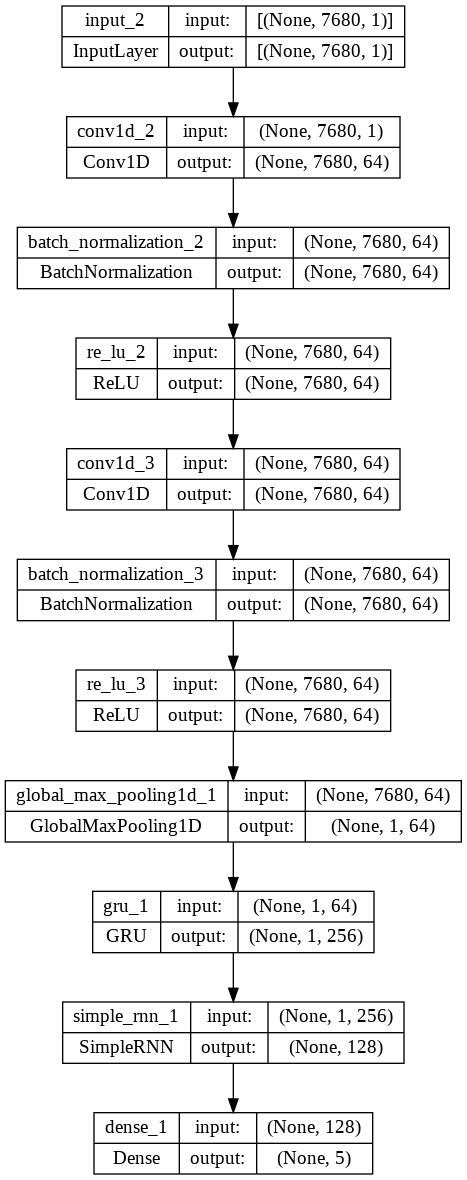

In [39]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    #conv1 = keras.layers.Dropout()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    #conv1 = keras.layers.Dropout()(conv1)

    #conv3 = keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="same")(conv2)
    #conv3 = keras.layers.BatchNormalization()(conv3)
    #conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalMaxPooling1D(keepdims=True)(conv2)
    #print(gap.shape)
    #gap = keras.layers.Reshape(('None','None',7680))(gap)
    #tf.keras.layers.Reshape((1,1,1))(gap)
    #Reshape((12, 12, 2560))(drop5_1)
    #tf.reshape(gap, [1,1,1])(gap)
    #print(gap.shape)

    #units: Positive integer, dimensionality of the output space.

    #Bi_GRU_layer = keras.layers.Bidirectional(keras.layers.GRU(10, return_sequences=True) ,return_sequences=True)(gap)
    #print(gap.shape)

    GRU = keras.layers.GRU(256, return_sequences=True)(gap)
    #keras.layers.CuDNNGRU(256, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, return_sequences=False, return_state=False, stateful=False)
    #print(GRU)

    simplernn = keras.layers.SimpleRNN(128)(GRU)
    

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(simplernn)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

model_1 = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model_1, show_shapes=True)

In [30]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7680, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 7680, 64)          384       
                                                                 
 batch_normalization (BatchN  (None, 7680, 64)         256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 7680, 64)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 7680, 64)          20544     
                                                                 
 batch_normalization_1 (Batc  (None, 7680, 64)         256       
 hNormalization)                                             

model training

In [45]:
weightss

{0: 1.1447569565869011,
 1: 1.7743998761034536,
 2: 0.5460928004575677,
 3: 1.0405794468916034,
 4: 1.297542468856172}

In [46]:
epochs = 500
batch_size = 64

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "/content/drive/MyDrive/physionet/capstone_model/256Hz/best_model_1_256Hz_5class.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model_1.compile(
    optimizer="adam", #sgd와 adam의 차이는?
    loss= "CategoricalCrossentropy",
    metrics=["categorical_accuracy"],
)
history = model_1.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
    class_weight= weightss,
)

Epoch 1/500


UnimplementedError: ignored

모델1 학습 결과

In [ ]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

모델2 ( CNNBlock - Bi_GRU_layer - FC-softmax ( Bidirection O)  )

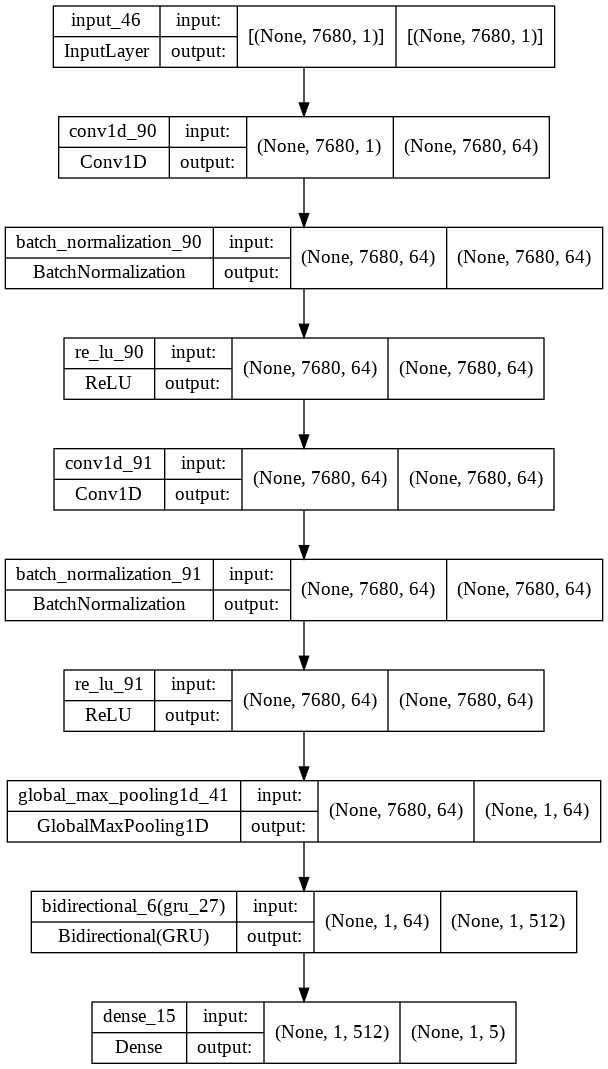

In [87]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    #conv1 = keras.layers.Dropout()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    #conv1 = keras.layers.Dropout()(conv1)

    #conv3 = keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="same")(conv2)
    #conv3 = keras.layers.BatchNormalization()(conv3)
    #conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalMaxPooling1D(keepdims=True)(conv2)
    #print(gap.shape)
    #gap = keras.layers.Reshape(('None','None',7680))(gap)
    #tf.keras.layers.Reshape((1,1,1))(gap)
    #Reshape((12, 12, 2560))(drop5_1)
    #tf.reshape(gap, [1,1,1])(gap)
    #print(gap.shape)

    #units: Positive integer, dimensionality of the output space.
    #Bidirectional(LSTM(10, return_sequences=True), input_shape=(5, 10))

    forward_layer = keras.layers.GRU(256,return_sequences=True)
    backward_layer = keras.layers.GRU(256,activation='relu',return_sequences=True,go_backwards=True)

    #model.add(Bidirectional(forward_layer, backward_layer=backward_layer,
    #                     input_shape=(5, 10)))

    Bi_GRU_layer = keras.layers.Bidirectional(forward_layer, backward_layer=backward_layer,)(gap)
    #print(gap.shape)

    #GRU = keras.layers.GRU(256, return_sequences=True)(gap)
    #keras.layers.CuDNNGRU(256, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, return_sequences=False, return_state=False, stateful=False)
    #print(GRU)

    #simplernn = keras.layers.SimpleRNN(128)(GRU)
    

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(Bi_GRU_layer)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model_2 = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model_2, show_shapes=True)

In [88]:
model_2.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_46 (InputLayer)       [(None, 7680, 1)]         0         
                                                                 
 conv1d_90 (Conv1D)          (None, 7680, 64)          384       
                                                                 
 batch_normalization_90 (Bat  (None, 7680, 64)         256       
 chNormalization)                                                
                                                                 
 re_lu_90 (ReLU)             (None, 7680, 64)          0         
                                                                 
 conv1d_91 (Conv1D)          (None, 7680, 64)          20544     
                                                                 
 batch_normalization_91 (Bat  (None, 7680, 64)         256       
 chNormalization)                                         

In [ ]:
epochs = 500
batch_size = 64

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "/content/drive/MyDrive/physionet/capstone_model/256Hz/best_model_2_256Hz_5class.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model_2.compile(
    optimizer="adam", #sgd와 adam의 차이는?
    loss= "CategoricalCrossentropy",
    metrics=["categorical_accuracy"],
)
history = model_2.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
    class_weight= weightss,
)

model2 학습 결과

In [ ]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

confusion matrix

In [ ]:
# confusion matrix 사용을 위한 라이브러리
from sklearn.metrics import confusion_matrix

# confusion matrix 그리는 함수 
def plot_confusion_matrix(con_mat, labels, title='Confusion Matrix', cmap=plt.cm.get_cmap('Blues'), normalize=False):
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    marks = np.arange(len(labels))
    nlabels = []
    for k in range(len(con_mat)):
        n = sum(con_mat[k])
        nlabel = '{0}(n={1})'.format(labels[k],n)
        nlabels.append(nlabel)
    plt.xticks(marks, labels)
    plt.yticks(marks, nlabels)

    thresh = con_mat.max() / 2.
    if normalize:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, '{0}%'.format(con_mat[i, j] * 100 / n), horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    else:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, con_mat[i, j], horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# 예측값과 참값 
pred_labels = np.argmax(predictions, axis=1)
true_labels = test_set.labels

#메인 실행 
confusion_matrix = confusion_matrix(true_labels, pred_labels)
plot_confusion_matrix(confusion_matrix, labels=labels, normalize=True)

In [ ]:
tf.keras.metrics.AUC(
    num_thresholds=200,
    curve="ROC",
    summation_method="interpolation",
    name=None,
    dtype=None,
    thresholds=None,
    multi_label=False,
    num_labels=None,
    label_weights=None,
    from_logits=False,
)

###Inference

In [ ]:
#test data 준비

Test_x = []
Test_y = []

test_non_match = []
test_match = 0

#valid data 준비

for i in range(len(test_x)):
  print(f'test_x[{i}] : {test_x[i]}')
  print(f'test_y[{i}] : {test_y[i]}')

  #label data 전처리
  _, _, annotations_header = highlevel.read_edf(test_y[i])
  ann = annotations_header['annotations']
  label = []
  for j in range(len(ann)):
    s = ann[j][2][0].upper()       #첫 번째 글자가 S인 것만 추출
    if s == 'S':                   #Lights off & Lights on 제거
      label.append(ann[j][2])
  annotations_len = len(label)    

  #signal data 전처리

  signals, _, signals_header = highlevel.read_edf(test_x[i],ch_names='ECG')
  signal = remove_remains(signals[0], num_sample)
  signals_len = len(signal)
  print(f'signals_len : {signals_len}')
  print(f'annotations_len : {annotations_len}')
  print("\n")
  
  if signals_len == annotations_len:     # 30초 단위의 signal sample수와 label 수가 일치해야만 Train data로 사용할 수 있도록
    test_match += 1
    
    for sample in range(signals_len):
      Test_x.append(signal[sample])
      Test_y.append(label[sample])
  else :
    test_non_match.append((test_x[i],test_y[i])) 


print(f'num_test_matched : {test_match}')
print(f'num_test_non_matched : {len(test_non_match)}')
print(f'test_non_matched_list : {test_non_match}')

del test_non_match
del label

test_x[0] : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN006.edf
test_y[0] : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN006_sleepscoring.edf
signals_len : 866
annotations_len : 866


test_x[1] : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN012.edf
test_y[1] : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN012_sleepscoring.edf
signals_len : 937
annotations_len : 937


test_x[2] : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN019.edf
test_y[2] : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN019_sleepscoring.edf
signals_len : 840
annotations_len : 840


test_x[3] : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN025.edf
test_y[3] : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN025_sleepscoring.edf
signals_len : 990
annotations_len : 990


test_x[4] : /content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recording

In [ ]:
x_test = np.array(Test_x)
del Test_x 
y_test = np.array(Test_y)
del Test_y

In [ ]:
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

#Converts a class vector (integers) to binary class matrix.

#E.g. for use with categorical_crossentropy.

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

###scikit-learn 분류모델

In [ ]:
#print(np.shape(Train_x))
#print(np.shape(Train_y))
#print(np.shape(signal_))
#print(np.shape(label))

In [ ]:
len(Train_x[5000])

7680

In [ ]:
 #train, test 데이터 분리
 #X:feature데이터만 / y:정답label데이터만 
 #X데이터셋을 머신러닝 모델에 입력 -> 모델이 내뱉는 품종 예측 결과를 정답 y와 비교하여 학습
X_train, X_test, y_train, y_test = train_test_split(signal_,  #feature(입력받는 특징 데이터)
                                                    label,  #label(모델이 맞춰야하는 정답값)
                                                    test_size=0.1,  #test dataset 크기 조절(0.2=전체 20%를 test데이터로 사용)
                                                    random_state=7)  #train데이터와 test데이터 분리시 적용되는 랜덤성)

In [ ]:
# (4)decision tree 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32) #decision_tree변수에 모델 저장
decision_tree.fit(Train_x, Train_y) #fit메서드로 모델 학습

#inference

y_pred = decision_tree.predict(Test_x)

print(classification_report(Test_y, y_pred))

                precision    recall  f1-score   support

Sleep stage N1       0.10      0.13      0.12       857
Sleep stage N2       0.39      0.35      0.37      3245
Sleep stage N3       0.22      0.17      0.19      1882
 Sleep stage R       0.16      0.17      0.17      1346
 Sleep stage W       0.15      0.19      0.17      1125

      accuracy                           0.24      8455
     macro avg       0.20      0.20      0.20      8455
  weighted avg       0.25      0.24      0.24      8455



In [ ]:
#Stochastic Gradient Descent Classifier (SGDClassifier)
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(Train_x, Train_y)
y_pred = sgd_model.predict(Test_x)

print(classification_report(Test_y, y_pred))

                precision    recall  f1-score   support

Sleep stage N1       0.10      0.12      0.11       857
Sleep stage N2       0.39      0.32      0.35      3245
Sleep stage N3       0.22      0.20      0.21      1882
 Sleep stage R       0.16      0.21      0.18      1346
 Sleep stage W       0.14      0.14      0.14      1125

      accuracy                           0.23      8455
     macro avg       0.20      0.20      0.20      8455
  weighted avg       0.25      0.23      0.24      8455



In [ ]:
#Support Vector Machine (SVM)
#Support Vector와 Hyperplane(초평면)을 이용해서 분류를 수행하게 되는 대표적인 선형 분류 알고리즘

from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(Train_x, Train_y)
y_pred = svm_model.predict(Test_x)

print(classification_report(Test_y, y_pred))

In [ ]:
#Logistic Regression
#소프트맥스(softmas) 함수를 사용한 다중 클래스 분류 알고리즘
#이름은 회귀지만, 실제로는 분류를 수행

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(Train_x, Train_y)
y_pred = logistic_model.predict(Test_x)

print(classification_report(Test_y, y_pred))

NameError: ignored

In [ ]:
Taccuracy = accuracy_score(y_test, y_pred)
accuracy   

0.21935483870967742

###시각화

['EEG F4-M1', 'EEG C4-M1', 'EEG O2-M1', 'EEG C3-M2', 'EMG chin', 'EOG E1-M2', 'EOG E2-M2', 'ECG']
Duaration:23191
Freq.:[256 256 256 256 256 256 256 256]
N-Sample(=Freq x Duaration):[5936896 5936896 5936896 5936896 5936896 5936896 5936896 5936896]
Date:2001-01-01 00:49:00


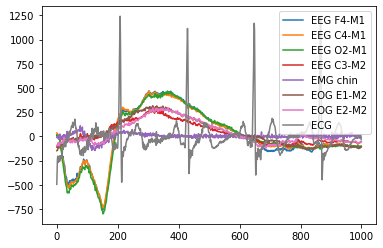

In [ ]:
edf = pyedflib.EdfReader(trains[0])
Labels = edf.getSignalLabels()
print(Labels)
print("Duaration:"+str(edf.getFileDuration()))
print("Freq.:"+str(edf.getSampleFrequencies()))
print("N-Sample(=Freq x Duaration):"+str(edf.getNSamples()))
print("Date:"+str(edf.getStartdatetime()))

#sample의 개수는 frequecncy * duration 이다
#초당 256개의 진폭 값이 있고 그것이 duration 만큼 있는 것이니



plt.plot(edf.readSignal(0)[0:1000],label=labels[0])
plt.plot(edf.readSignal(1)[0:1000],label=labels[1])
plt.plot(edf.readSignal(2)[0:1000],label=labels[2])
plt.plot(edf.readSignal(3)[0:1000],label=labels[3])
plt.plot(edf.readSignal(4)[0:1000],label=labels[4])
plt.plot(edf.readSignal(5)[0:1000],label=labels[5])
plt.plot(edf.readSignal(6)[0:1000],label=labels[6])
plt.plot(edf.readSignal(7)[0:1000],label=labels[7])
plt.legend()
plt.show()

#----

In [ ]:
label = []
if ann[2] == 'Sleep stage W':
  for time in range(length):
    label.append(0)
    elif ann[2] == 'Sleep stage 1':
            for time in range(length):
                label.append(1)
        elif ann[2] == 'Sleep stage 2':
            for time in range(length):
                label.append(2)
        elif ann[2] == 'Sleep stage 3':
            for time in range(length):
                label.append(3)
        elif ann[2] == 'Sleep stage 4':
            for time in range(length):
                label.append(3)
        elif ann[2] == 'Sleep stage R':
            for time in range(length):
                label.append(4)
        else:
            for time in range(length):
                label.append(5)
    label = np.array(label)

In [ ]:
a = highlevel.read_edf(trains[0],ch_names='ECG')
b = highlevel.read_edf(labels[0])
print(type(a))
a = list(a)
b = list(b)
print(a)
print(len(a[0][0]))
print(a[0])
print(b)
a = a[0]
b = b[2]
print(a)
print(b)
print(len(a))
print(b)


<class 'tuple'>
5936896
[[-4.95161364e+02 -3.51604486e+02 -2.39322499e+02 ... -3.66216526e-02
  -3.66216526e-02 -3.66216526e-02]]
[array([], dtype=float64), [], {'technician': '', 'recording_additional': '', 'patientname': 'X', 'patient_additional': '', 'patientcode': 'SN031', 'equipment': '', 'admincode': '', 'gender': '', 'startdate': datetime.datetime(2001, 1, 1, 0, 49), 'birthdate': '', 'annotations': [[0.0, 30.0, 'Sleep stage W'], [30.0, 30.0, 'Sleep stage W'], [32.4, 0.0, 'Lights off@@SaO2'], [60.0, 30.0, 'Sleep stage W'], [90.0, 30.0, 'Sleep stage W'], [120.0, 30.0, 'Sleep stage W'], [150.0, 30.0, 'Sleep stage W'], [180.0, 30.0, 'Sleep stage W'], [210.0, 30.0, 'Sleep stage W'], [240.0, 30.0, 'Sleep stage W'], [270.0, 30.0, 'Sleep stage W'], [300.0, 30.0, 'Sleep stage W'], [330.0, 30.0, 'Sleep stage W'], [360.0, 30.0, 'Sleep stage W'], [390.0, 30.0, 'Sleep stage W'], [420.0, 30.0, 'Sleep stage W'], [450.0, 30.0, 'Sleep stage W'], [480.0, 30.0, 'Sleep stage W'], [510.0, 30.0, 'Sle

In [ ]:
edf = pyedflib.EdfReader(trains[0])
print(edf)

In [ ]:
f = pyedflib.data.test_generator()
print(f.readSignal(0))
print(edf.readSignal(7))

[ 99.99237049  99.99237049  99.99237049 ... -99.96185245 -99.96185245
 -99.96185245]
[-8.53284504 20.91096361  7.58068208 ... -0.03662165 -0.03662165
 -0.03662165]


In [ ]:
print(trains)

['/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN031.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN032.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN033.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN034.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN035.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN036.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN037.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN038.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN039.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN040.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN041.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-staging/recordings/SN042.edf', '/content/drive/MyDrive/physionet/HMC/hmc-sleep-sta

In [ ]:
f = pyedflib.EdfReader(trains[47])
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)

In [ ]:
print((len(sigbufs[7])))
print(sigbufs[7])#

8583680
[-9.33485924e+01 -7.11558709e+01 -1.20888075e+02 ... -3.66216526e-02
 -3.66216526e-02 -3.66216526e-02]


In [ ]:
edfl = pyedflib.EdfReader(labels[0])
print("Anotation:"+str(edfl.read_annotation()))
print(len(edfl.read_annotation()))

Anotation:[[0, b'30', b'Sleep stage W'], [300000000, b'30', b'Sleep stage W'], [324000000, b'0', b'Lights off@@SaO2'], [600000000, b'30', b'Sleep stage W'], [900000000, b'30', b'Sleep stage W'], [1200000000, b'30', b'Sleep stage W'], [1500000000, b'30', b'Sleep stage W'], [1800000000, b'30', b'Sleep stage W'], [2100000000, b'30', b'Sleep stage W'], [2400000000, b'30', b'Sleep stage W'], [2700000000, b'30', b'Sleep stage W'], [3000000000, b'30', b'Sleep stage W'], [3300000000, b'30', b'Sleep stage W'], [3600000000, b'30', b'Sleep stage W'], [3900000000, b'30', b'Sleep stage W'], [4200000000, b'30', b'Sleep stage W'], [4500000000, b'30', b'Sleep stage W'], [4800000000, b'30', b'Sleep stage W'], [5100000000, b'30', b'Sleep stage W'], [5400000000, b'30', b'Sleep stage W'], [5700000000, b'30', b'Sleep stage W'], [6000000000, b'30', b'Sleep stage W'], [6300000000, b'30', b'Sleep stage W'], [6600000000, b'30', b'Sleep stage W'], [6900000000, b'30', b'Sleep stage W'], [7200000000, b'30', b'Sle

In [ ]:
(1초당 256개의 진폭데이터)가 60 0000000

#기타

In [ ]:
!pip install mne  
!pip install mne.io

     |████████████████████████████████| 7.5 MB 25.9 MB/s 
ERROR: Could not find a version that satisfies the requirement mne.io (from versions: none)
ERROR: No matching distribution found for mne.io


ERROR: Could not find a version that satisfies the requirement dhedfreader (from versions: none)
ERROR: No matching distribution found for dhedfreader


In [ ]:
import argparse
import glob
import math
import ntpath
import os
import shutil
import urllib.request, urllib.parse, urllib.error
import urllib.request, urllib.error, urllib.parse

from datetime import datetime

import numpy as np

from mne import Epochs, pick_types, find_events
from mne.io import concatenate_raws, read_raw_edf

import dhedfreader


# Label values
W = 0
N1 = 1
N2 = 2
N3 = 3
REM = 4
UNKNOWN = 5

stage_dict = {
    "W": W,
    "N1": N1,
    "N2": N2,
    "N3": N3,
    "REM": REM,
    "UNKNOWN": UNKNOWN
}

class_dict = {
    0: "W",
    1: "N1",
    2: "N2",
    3: "N3",
    4: "REM",
    5: "UNKNOWN"
}

ann2label = {
    "Sleep stage W": 0,
    "Sleep stage 1": 1,
    "Sleep stage 2": 2,
    "Sleep stage 3": 3,
    "Sleep stage 4": 3,
    "Sleep stage R": 4,
    "Sleep stage ?": 5,
    "Movement time": 5
}

EPOCH_SEC_SIZE = 30


def main():
    parser = argparse.ArgumentParser()
    parser.add_argument("--data_dir", type=str, default="/content/drive/MyDrive/HMC",
                        help="File path to the CSV or NPY file that contains walking data.")
    parser.add_argument("--output_dir", type=str, default="/content/drive/MyDrive/HMC/HMC_output",
                        help="Directory where to save outputs.")
    parser.add_argument("--select_ch", type=str, default="ECG",
                        help="File path to the trained model used to estimate walking speeds.")
    args = parser.parse_args()

    # Output dir
    if not os.path.exists(args.output_dir):
        os.makedirs(args.output_dir)
    else:
        shutil.rmtree(args.output_dir)
        os.makedirs(args.output_dir)

    # Select channel
    select_ch = args.select_ch

    # Read raw and annotation EDF files
    psg_fnames = glob.glob(os.path.join(args.data_dir, "*.edf"))
    ann_fnames = glob.glob(os.path.join(args.data_dir, "*sleepscoring.edf"))
    psg_fnames.sort()
    ann_fnames.sort()
    psg_fnames = np.asarray(psg_fnames)
    ann_fnames = np.asarray(ann_fnames)

    for i in range(len(psg_fnames)):
        # if not "ST7171J0-PSG.edf" in psg_fnames[i]:
        #     continue

        raw = read_raw_edf(psg_fnames[i], preload=True, stim_channel=None)
        sampling_rate = raw.info['sfreq']
        raw_ch_df = raw.to_data_frame(scaling_time=100.0)[select_ch]
        raw_ch_df = raw_ch_df.to_frame()
        raw_ch_df.set_index(np.arange(len(raw_ch_df)))

        # Get raw header
        f = open(psg_fnames[i], 'r', encoding='iso-8859-1')
        reader_raw = dhedfreader.BaseEDFReader(f)
        reader_raw.read_header()
        h_raw = reader_raw.header
        f.close()
        raw_start_dt = datetime.strptime(h_raw['date_time'], "%Y-%m-%d %H:%M:%S")

        # Read annotation and its header
        f = open(ann_fnames[i], 'r', encoding='iso-8859-1')
        reader_ann = dhedfreader.BaseEDFReader(f)
        reader_ann.read_header()
        h_ann = reader_ann.header
        _, _, ann = list(zip(*reader_ann.records()))
        f.close()
        ann_start_dt = datetime.strptime(h_ann['date_time'], "%Y-%m-%d %H:%M:%S")

        # Assert that raw and annotation files start at the same time
        assert raw_start_dt == ann_start_dt

        # Generate label and remove indices
        remove_idx = []    # indicies of the data that will be removed
        labels = []        # indicies of the data that have labels
        label_idx = []
        for a in ann[0]:
            onset_sec, duration_sec, ann_char = a
            ann_str = "".join(ann_char)
            label = ann2label[ann_str]
            if label != UNKNOWN:
                if duration_sec % EPOCH_SEC_SIZE != 0:
                    raise Exception("Something wrong")
                duration_epoch = int(duration_sec / EPOCH_SEC_SIZE)
                label_epoch = np.ones(duration_epoch, dtype=np.int) * label
                labels.append(label_epoch)
                idx = int(onset_sec * sampling_rate) + np.arange(duration_sec * sampling_rate, dtype=np.int)
                label_idx.append(idx)

                print("Include onset:{}, duration:{}, label:{} ({})".format(
                    onset_sec, duration_sec, label, ann_str
                ))
            else:
                idx = int(onset_sec * sampling_rate) + np.arange(duration_sec * sampling_rate, dtype=np.int)
                remove_idx.append(idx)

                print("Remove onset:{}, duration:{}, label:{} ({})".format(
                    onset_sec, duration_sec, label, ann_str
                ))
        labels = np.hstack(labels)
        
        print("before remove unwanted: {}".format(np.arange(len(raw_ch_df)).shape))
        if len(remove_idx) > 0:
            remove_idx = np.hstack(remove_idx)
            select_idx = np.setdiff1d(np.arange(len(raw_ch_df)), remove_idx)
        else:
            select_idx = np.arange(len(raw_ch_df))
        print("after remove unwanted: {}".format(select_idx.shape))

        # Select only the data with labels
        print("before intersect label: {}".format(select_idx.shape))
        label_idx = np.hstack(label_idx)
        select_idx = np.intersect1d(select_idx, label_idx)
        print("after intersect label: {}".format(select_idx.shape))

        # Remove extra index
        if len(label_idx) > len(select_idx):
            print("before remove extra labels: {}, {}".format(select_idx.shape, labels.shape))
            extra_idx = np.setdiff1d(label_idx, select_idx)
            # Trim the tail
            if np.all(extra_idx > select_idx[-1]):
                n_trims = len(select_idx) % int(EPOCH_SEC_SIZE * sampling_rate)
                n_label_trims = int(math.ceil(n_trims / (EPOCH_SEC_SIZE * sampling_rate)))
                select_idx = select_idx[:-n_trims]
                labels = labels[:-n_label_trims]
            print("after remove extra labels: {}, {}".format(select_idx.shape, labels.shape))

        # Remove movement and unknown stages if any
        raw_ch = raw_ch_df.values[select_idx]

        # Verify that we can split into 30-s epochs
        if len(raw_ch) % (EPOCH_SEC_SIZE * sampling_rate) != 0:
            raise Exception("Something wrong")
        n_epochs = len(raw_ch) / (EPOCH_SEC_SIZE * sampling_rate)

        # Get epochs and their corresponding labels
        x = np.asarray(np.split(raw_ch, n_epochs)).astype(np.float32)
        y = labels.astype(np.int32)

        assert len(x) == len(y)

        # Select on sleep periods
        w_edge_mins = 30
        nw_idx = np.where(y != stage_dict["W"])[0]
        start_idx = nw_idx[0] - (w_edge_mins * 2)
        end_idx = nw_idx[-1] + (w_edge_mins * 2)
        if start_idx < 0: start_idx = 0
        if end_idx >= len(y): end_idx = len(y) - 1
        select_idx = np.arange(start_idx, end_idx+1)
        print(("Data before selection: {}, {}".format(x.shape, y.shape)))
        x = x[select_idx]
        y = y[select_idx]
        print(("Data after selection: {}, {}".format(x.shape, y.shape)))

        # Save
        filename = ntpath.basename(psg_fnames[i]).replace("-PSG.edf", ".npz")
        save_dict = {
            "x": x, 
            "y": y, 
            "fs": sampling_rate,
            "ch_label": select_ch,
            "header_raw": h_raw,
            "header_annotation": h_ann,
        }
        np.savez(os.path.join(args.output_dir, filename), **save_dict)

        print("\n=======================================\n")


if __name__ == "__main__":
    main()

ModuleNotFoundError: ignored

#Importing libraries and initializing variables

In [ ]:
!pip install edfreader

ERROR: Could not find a version that satisfies the requirement edfreader (from versions: none)
ERROR: No matching distribution found for edfreader


In [ ]:
%matplotlib inline

import glob
import math
import ntpath
import random, os, sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import edfreader
import models
import mne
import pyeeg
import warnings
warnings.filterwarnings('ignore')

from matplotlib.backends.backend_pdf import PdfPages
from mne.datasets.sleep_physionet._utils import _fetch_one, _data_path, AGE_SLEEP_RECORDS, _check_subjects
from datetime import datetime
from mne import Epochs, pick_types, find_events
from mne.io import concatenate_raws, read_raw_edf
from mne.time_frequency import psd_welch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import FunctionTransformer
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from tensorflow import keras
# from tensorflow.keras import optimizers, losses
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Model, load_model
# from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, MaxPool1D, Activation, SpatialDropout1D, GlobalMaxPool1D
# from tensorflow.keras.layers import Reshape, LSTM, TimeDistributed, Bidirectional, BatchNormalization, Flatten, RepeatVector
# from tensorflow.keras.layers import concatenate
# from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.externals import joblib
# from sklearn.preprocessing import StandardScaler
# from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, log_loss
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_auc_score, roc_curve
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost

VBS = True  # constant boolean to enable/disbale verbose
EPOCH_SEC_SIZE = 30  # Epoch duration selection
seed = 42  # seed value for the random seeds
batch_size = 64
number_of_subj = 50

# values to label the stages
UNKNOWN = -1
W = 0
N1 = 1
N2 = 2
N3 = 3
REM = 4

# making string dictionary for the label values
label_dict = {
    "UNKNOWN"  : UNKNOWN,
    "W"        : W,
    "N1"       : N1,
    "N2"       : N2,
    "N3"       : N3,
    "REM"      : REM
}

# converting from label values to strings 
class_dict = {
    -1: "UNKNOWN",
    0 : "W",
    1 : "N1",
    2 : "N2",
    3 : "N3",
    4 : "REM"
}

# annotation dictionary to convert from string to label values
annot2label = {
    "Sleep stage ?": -1,
    "Movement time": -1,
    "Sleep stage W": 0,
    "Sleep stage 1": 1,
    "Sleep stage 2": 2,
    "Sleep stage 3": 3,
    "Sleep stage 4": 3,
    "Sleep stage R": 4
}
project_path = os.path.abspath(os.getcwd())  # finding the current project path in windows

ModuleNotFoundError: ignored

In [ ]:
mol = np.array([1,2,3])
print(mol)
mol = mol[np.array([1,0,2])] 
print(mol)

[1 2 3]
[2 1 3]


Localizing fetch_data function to import all subjects


In [ ]:
# localized fetch_data function by using mne library
# https://github.com/mne-tools/mne-python/blob/maint/0.20/mne/datasets/sleep_physionet/age.py#L18-L111
data_path = _data_path
BASE_URL = 'https://physionet.org/physiobank/database/sleep-edfx/sleep-cassette/'
def fetch_data(subjects, recording=[1, 2], path=None, force_update=False,
               update_path=None, base_url=BASE_URL,
               verbose=None):  # noqa: D301
    records = np.loadtxt(AGE_SLEEP_RECORDS,
                         skiprows=1,
                         delimiter=',',
                         usecols=(0, 1, 2, 6, 7),
                         dtype={'names': ('subject', 'record', 'type', 'sha',
                                          'fname'),
                                'formats': ('<i2', 'i1', '<S9', 'S40', '<S22')}
                         )
    psg_records = records[np.where(records['type'] == b'PSG')]
    hyp_records = records[np.where(records['type'] == b'Hypnogram')]

    path = data_path(path=path, update_path=update_path)
    params = [path, force_update, base_url]
    fnames = []
    for subject in subjects:
        for idx in np.where(psg_records['subject'] == subject)[0]:
            if psg_records['record'][idx] in recording:
                psg_fname = _fetch_one(psg_records['fname'][idx].decode(),
                                       psg_records['sha'][idx].decode(),
                                       *params)
                hyp_fname = _fetch_one(hyp_records['fname'][idx].decode(),
                                       hyp_records['sha'][idx].decode(),
                                       *params)
                fnames.append([psg_fname, hyp_fname])

    return fnames

NameError: ignored

In [ ]:
path = '/content/drive/MyDrive/HMC/'

#test_images = sorted(
#    glob.glob(os.path.join(data_dir,)))
#data_list = sorted(glob.glob(os.path.join(path,"SN*",".edf")))
data_list = glob.glob(path+'/**')
print(data_list)

trains=[]
labels=[]
trains = [x for x in data_list if x.startswith('edf',33)]
labels = [x for x in data_list if x.endswith('_sleepscoring.edf')]
print(trains)
print("#########")
print(labels)
print("#########")
print(highlevel.read_edf(trains[0]))
print(highlevel.read_edf(labels[0]))
signals, _, signals_header = highlevel.read_edf(trains[0],ch_names='ECG')
print(f'signals={signals}')
print(len(signals[0]))

['/content/drive/MyDrive/HMC/SN001_sleepscoring.edf', '/content/drive/MyDrive/HMC/SN001.edf']
['/content/drive/MyDrive/HMC/SN001.edf']
#########
['/content/drive/MyDrive/HMC/SN001_sleepscoring.edf']
#########
(array([[ 1.71267262e+01,  1.82253758e+01,  1.75906004e+01, ...,
        -1.22072175e-02, -1.22072175e-02, -1.22072175e-02],
       [ 1.47585260e+01,  1.55642023e+01,  1.06324865e+01, ...,
        -1.22072175e-02, -1.22072175e-02, -1.22072175e-02],
       [ 3.83428702e+01,  3.71221485e+01,  2.41092546e+01, ...,
        -1.22072175e-02, -1.22072175e-02, -1.22072175e-02],
       ...,
       [ 3.74761578e+00,  1.09987030e+01,  2.16433967e+01, ...,
        -1.22072175e-02, -1.22072175e-02, -1.22072175e-02],
       [-9.28969253e+00, -1.09010452e+01, -9.50942245e+00, ...,
        -1.22072175e-02, -1.22072175e-02, -1.22072175e-02],
       [ 7.37193866e+01,  7.09361410e+01,  6.93980316e+01, ...,
        -3.66216526e-02, -3.66216526e-02, -3.66216526e-02]]), [{'label': 'EEG F4-M1', 'dimensi